In [1]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Step1. 下載資料

In [2]:
iris=datasets.load_iris()
X=iris.data
y=iris.target

## Step2. 區分訓練集與測試集

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

## Step3. 建模

- n_neighbors : K
- weights: 'uniform' / 'distance' / 其他
- algorithm: 'auto' / 'brute' / 'kd_tree' / 'ball_tree'
- p: 1→曼哈頓距離 / 2→歐基里德距離 / 其他: 明氏距離

In [4]:
# clf=KNeighborsClassifier(n_neighbors=3,p=2,weights='distance',algorithm='brute')
clf = KNeighborsClassifier(n_neighbors=3, p=2, weights='distance')
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

## Step4. 預測

In [5]:
clf.predict(X_test)

array([2, 0, 2, 1, 2, 0, 1, 2, 2, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2,
       1, 2, 2, 0, 2, 2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 2, 2, 2, 0, 2, 0, 1,
       0])

## Step5. 準確程度評估

In [6]:
clf.score(X_test,y_test)

0.9111111111111111

In [7]:
clf.score(X_train,y_train)

1.0

## Step6. 尋找合適的K
透過最原始的方式，把前述的所有步驟針對不同的K值都進行一次，<br>
用繪圖的方式看到合適K值的範圍。並回到資料準備的部分透過不斷的隨機切割樣本，測試K值得穩定度。

In [8]:
len(X_train)

105

In [9]:
import os
import warnings
warnings.filterwarnings("ignore", message="Could not find the number of physical cores")
os.environ["LOKY_MAX_CPU_COUNT"] = "4"

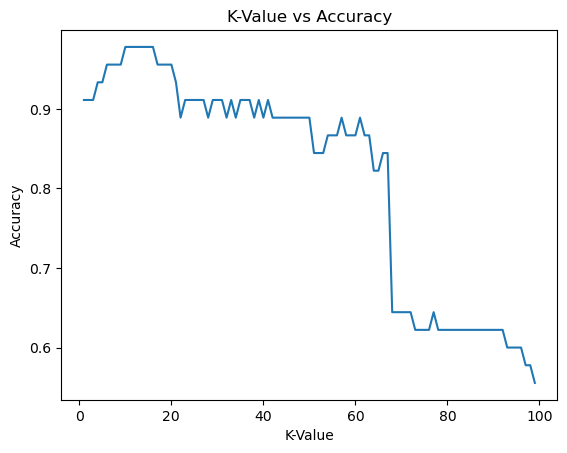

In [10]:
accuracy = []

for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train)                 
    y_pred = knn.predict(X_test)              
    accuracy.append(metrics.accuracy_score(y_test, y_pred)) 

k_range = range(1, 100)
plt.plot(k_range, accuracy)
plt.xlabel('K-Value')
plt.ylabel('Accuracy')
plt.title('K-Value vs Accuracy')
plt.show()

## 多次隨機切割數據集

通過多次隨機切割數據集，每次使用不同的隨機種子`random_state`來確保數據集的切割是隨機的。

在本例中，合適的K值範圍大約是1到40。在這個範圍內，KNN分類器能夠達到較高的平均準確率，接近0.9甚至更高。

當K值超過40後，準確率開始下降，並且在K值非常大時（如超過60），準確率急劇下降。

在選擇K值時，我們應該避免選擇過大的K值，因為這會導致分類器的性能顯著降低。

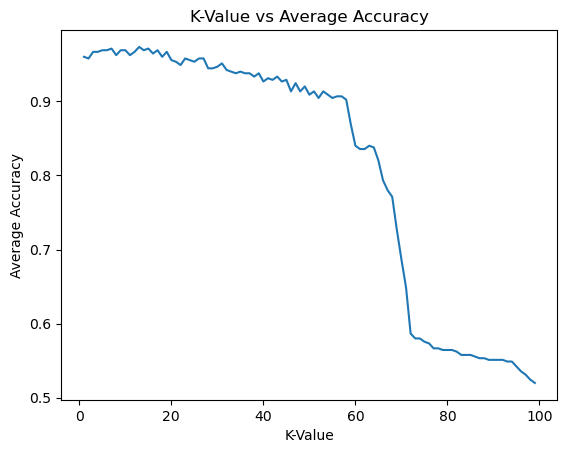

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, metrics
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data
y = iris.target

# 記錄每個K值在多次隨機切割下的準確率
accuracy_list = []

# 重複多次隨機切割
for random_seed in range(10):  # 進行10次隨機切割
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)
    accuracy = []
    for k in range(1, 100):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy.append(metrics.accuracy_score(y_test, y_pred))
    accuracy_list.append(accuracy)

# 計算每個K值在多次隨機切割下的平均準確率
avg_accuracy = np.mean(accuracy_list, axis=0)

# 繪製K值與平均準確率的圖
plt.plot(range(1, 100), avg_accuracy)
plt.xlabel('K-Value')
plt.ylabel('Average Accuracy')
plt.title('K-Value vs Average Accuracy')
plt.show()